In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('precision', 7)

''' Change the function of the right side of differential equation here
    y' = f(t, y), a <= t <= b, y(a) = alpha
    Choose f(t, y) = y - t^2 + 1 as a function and
    a = 0, b = 2, h_max = .25, h_min = .01, tol = 0.00001 for demonstration
'''
def eval_f(t, y):
    return (y - t**2 + 1)

''' Evaluation of the exact solution for comparision
    Make sure to change it accordingly with f(t, y) above
'''
def eval_y(t):
    return (t + 1)**2 - 0.5 * np.exp(t)

In [2]:
# Step 1: Set initial condition
tol, h_max, h_min, a, b, alpha = 10**-5, 0.25, 0.01, 0, 2, 0.5
cont, h, t, w = True, h_max, a, alpha
M = []

# Step 2
while(cont):
    
    # Step 3
    k1 = h * eval_f(t, w)
    k2 = h * eval_f(t + h/4, w + k1/4)
    k3 = h * eval_f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
    k4 = h * eval_f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
    k5 = h * eval_f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
    k6 = h * eval_f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
    
    # Step 4
    r = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)/h
    
    # Step 5
    if r < tol:
        # Step 6
        t += h
        w += 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
        y = eval_y(t)
        
        # Step 7
        M.append([t, y, w, h, round(r, 7)])
    
    # Step 8
    delta = 0.84 * (tol/r)**0.25
    
    # Step 9
    if delta <= 0.1:
        h /= 10
    elif delta >= 4:
        h *= 4
    else:
        h *= delta
    
    # Step 10
    if h > h_max:
        h = h_max
    
    # Step 11
    if t >= b or h < h_min:
        cont = False
    elif t + h > b:
        h = b - t
    
cols = ['t', 'y', 'w', 'h', 'R']
df_M = pd.DataFrame(M, columns=cols)
df_M

,t,y,w,h,R
0,0.2500000,0.9204873,0.9204886,0.2500000,0.0000062
1,0.4865522,1.3964884,1.3964910,0.2365522,0.0000045
2,0.7293332,1.9537446,1.9537488,0.2427810,0.0000043
3,0.9793332,2.5864198,2.5864260,0.2500000,0.0000038
4,1.2293332,3.2604520,3.2604605,0.2500000,0.0000024
5,1.4793332,3.9520844,3.9520955,0.2500000,0.0000007
6,1.7293332,4.6308127,4.6308268,0.2500000,0.0000015
7,1.9793332,5.2574687,5.2574861,0.2500000,0.0000043
8,2.0000000,5.3054720,5.3054896,0.0206668,0.0000000


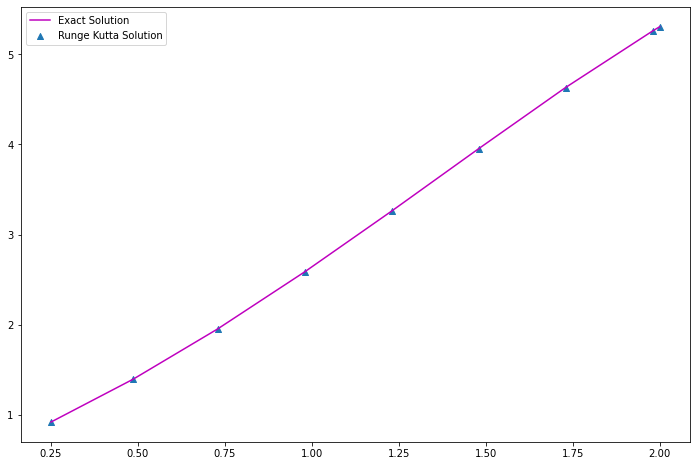

In [3]:
''' Plot the Runge Kutta solution and the exact solution for comparision
'''
plt.figure(figsize=[12, 8])
plt.plot(df_M['t'], df_M['y'], color='m', label='Exact Solution')
plt.scatter(df_M['t'], df_M['w'], marker='^', label='Runge Kutta Solution')
plt.legend()
plt.show()